# Dataset Description

**Source :**

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption



**Data Set Information:**

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.



**Attribute Information:**

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a  dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Importing some common Packages and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

### Loading Dataset using pandas Package

In [2]:
Data = pd.read_csv("C:\\Users\\SS\\Downloads\\MDS Course files\\Data set\\household_power_consumption\\household_power_consumption.txt",sep=';')

Dataset set is in txt format and also it separated by ';'. So, we used sep argument to make correct dataframe / tabel

In [3]:
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
Data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0
2075258,26/11/2010,21:02:00,0.932,0,239.55,3.8,0,0,0.0


## Checking Data Structure
-> Number of rows / instaces / enteries

-> Number of columns / features / attributes

In [5]:
print(f"Number of rows are {Data.shape[0]}. \nNumber of Columns are {Data.shape[1]}.")

Number of rows are 2075259. 
Number of Columns are 9.


## From the Head & Tail of the Dataset, we can see starting/minimum datestamp is '16-12-2006' & last/maximum datestamp is '26-11-2010'. This means this Data set is of 3 years 11 months 11 days. But the total number of obervation/instances are more than 20 Lakh/2 million which means data is recorded or given hourwise.

## We can forecast House Voltage on many level like hour level, day level, week level, month level, year level from the given data.

# -> let say Family whose house's readings are recorded want to estimate there montly electricity bill on the basis of power they used in a month. So according to this we try to Forcast Voltage of the house on montly level.

## Information about columns

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Clearly from this we can see there are many features which are numbers in real but categorised as object.

So, we will change their types.

In [7]:
Data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

To change the types of the columns, First we seprate Date, Time and Other Features then we **use apply function and .to_numeric function**

In [8]:
temp1 = Data[['Date', 'Time']]
temp1.head(2)

,Date,Time
0,16/12/2006,17:24:00
1,16/12/2006,17:25:00


In [9]:
temp1[['Date']] = temp1[['Date']].apply(pd.to_datetime)
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Time    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 31.7+ MB


In [10]:
temp1.head()

,Date,Time
0,2006-12-16,17:24:00
1,2006-12-16,17:25:00
2,2006-12-16,17:26:00
3,2006-12-16,17:27:00
4,2006-12-16,17:28:00


In [11]:
temp2 = Data[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
              'Sub_metering_3']]
temp2.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [12]:
temp2 = temp2.apply(pd.to_numeric, errors='coerce')
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


In [13]:
Data = pd.concat([temp1,temp2],axis=1)
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Now Data is ready with correct feature types

# Checking Missing Values

In [14]:
Data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

There are equal number of instances .i.e., 25979 which are empty in our Data. which means 25979 rows of the datasets are completely empty.

Let's check this!

In [15]:
# creating bool series True for NaN values 
bool_series = pd.isnull(Data)  
    
# filtering data  
# displaying data only with Voltage = NaN  
Data[bool_series]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2075254,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075255,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075256,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075257,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we fill these rows using **interpolate function** using linear method.

In [16]:
Data = Data.interpolate(method ='linear') 

Checking again if there left any null values. 

In [17]:
Data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Missing Values are handled

# Reseting Index
For Time Series Analysis we reset 'Date' as index

In [18]:
Data.set_index('Date',inplace = True)
Data.head(4)

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0


# Resampling Data on Monthly Level

Data we have is hourly. We change it to Monthly Level using Resample function

In [19]:
# Resample function returns a series

Model_Dataset = Data['Voltage'].resample('M').mean()

In [20]:
# we change series to a Dataframe

Model_Dataset = Model_Dataset.to_frame()

In [21]:
Model_Dataset.head()

,Voltage
Date,
2006-12-31,241.440787
2007-01-31,240.145796
2007-02-28,239.871107
2007-03-31,239.948532
2007-04-30,238.373893


In [22]:
print(f"Number of rows are {Model_Dataset.shape[0]}. \nNumber of Columns are {Model_Dataset.shape[1]}.")

Number of rows are 49. 
Number of Columns are 1.


Data is converted to 49 instances which means 49 months.

# Visualization

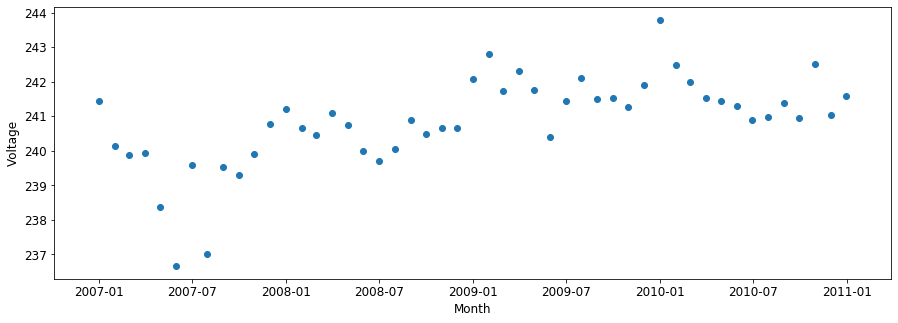

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(Model_Dataset.index,Model_Dataset['Voltage'])
plt.tick_params(labelsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Voltage',fontsize=12)
plt.show()

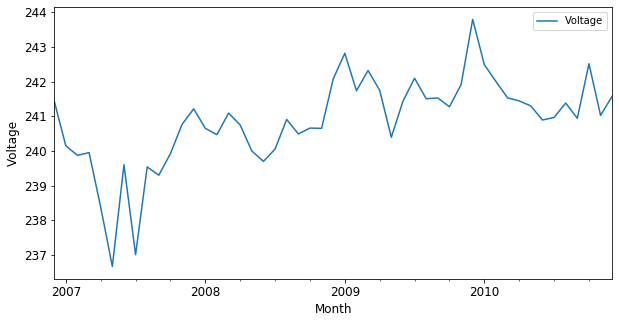

In [24]:
Model_Dataset.plot(figsize=[10,5],fontsize=12)
plt.legend(fontsize=10)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Voltage',fontsize=12)
plt.show()

### Observation:
1. Volage is increasing yearly.
2. Voltage in start of each year is lower and in end it is higher.
3. Between Month of March and July voltage always decreases to lowest point of the year.
4. In last 2 month of every year it increases to maximum voltage of the year.

# Decomposing of Data

### Importing module for decomposition

In [25]:
import statsmodels.api as sm

Reviewing the plot, it suggests that there is some seasonality, but the **amplitude (height) of the cycles does not appears to be increasing** or **seasonal variation is relatively constant over time**, suggesting that it is **Additive Model**.

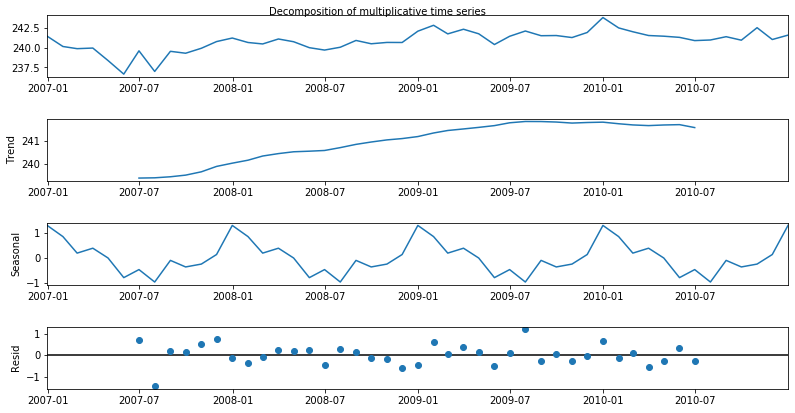

In [26]:
# Decomposition of Additive time series
decomposition = sm.tsa.seasonal_decompose(Model_Dataset, model = 'additive')

# Visualisation
grp = decomposition.plot()
grp.suptitle('Decomposition of multiplicative time series',fontsize = 10)
grp.set_figwidth(12)
grp.set_figheight(6)

plt.show()

**The following are some of our key observations from this analysis:**

1) Trend: clearly it is not a straight line. It is constantly increasing.

2) Seasonality: as discussed, seasonal plot displays a fairly consistent month-on-month or year-on-year pattern. The yearly seasonal components are average values for a year after removal of trend.

3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components.

The expectations from remainder component are that it should look like white noise a periodic pattern.

# Data Stationarity Test

There are two ways to check the stationarity of Data.

**1.** By Rolling mean and standard deviation.

**2.** Augmented Dickey–Fuller test (ADF) test

**First let check with Rolling Mean**

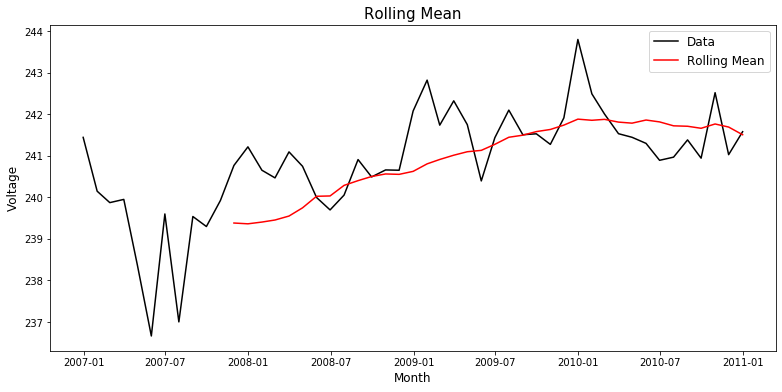

In [27]:
roll_mean = Model_Dataset.rolling(window = 12).mean()

plt.figure(figsize=(13,6))

plt.plot(Model_Dataset , color = 'black' , label = "Data")
plt.plot(roll_mean, color = 'red' , label = "Rolling Mean")
    
plt.legend(loc = 'best' , fontsize = 12)
plt.title("Rolling Mean" , fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Voltage', fontsize = 12)
plt.show()

Rolling Mean curve is increasing yearly. It is **not constant**. Therfefore, **Data is not stationary.**

### Now we define a Function which will test the data by both ways.

Importing adfuller function from stats tools module

In [28]:
from statsmodels.tsa.stattools import adfuller

**Defining DStationary_Test function** with two paramters timeseries & average to check stationarity.

In [29]:
def DStationary_Test(timeseries , average):
    plt.figure(figsize=(13,6))
    
    plt.plot(timeseries , color = 'black' , label = "Data")
    plt.plot(average , color = 'red' , label = "Rolling Mean")
    
    plt.legend(loc = 'best' , fontsize = 12)
    plt.title("Rolling Mean" , fontsize = 15)
    plt.xlabel('Month', fontsize = 12)
    plt.ylabel('Voltage', fontsize = 12)
    plt.show()
    
    print("\n\n")
    result=adfuller(timeseries)
    
    print('Augmented Dickey Fuller test:--')
    labels=['ADF Test Statistics','p-value','#Lags used','Number of Observation used']
    for value,label in zip(result,labels):
        print(f'{label} : {str(value)}')
        
    if result[1]<=0.05:
        print("\np-value < 0.05\nConclusion:\nStrong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("\np-value > 0.05\nConclusion:\nWeak evidence against the null hypothesis, accept the null hypothesis. Data is not stationary")

**Calling DStationarity_Test Function with shifting Model_Dataset by 1**

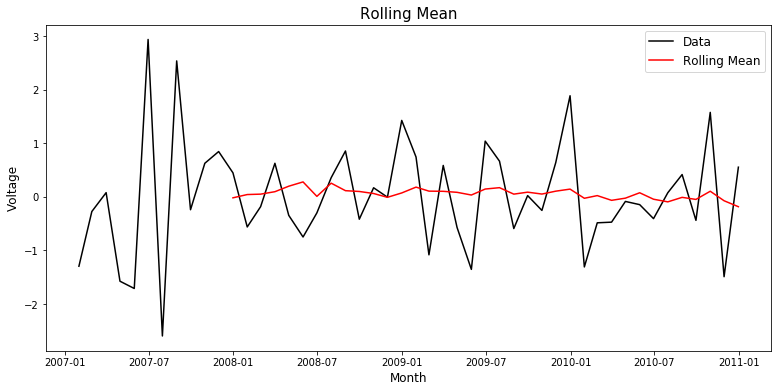




Augmented Dickey Fuller test:--
ADF Test Statistics : -6.179880589537664
p-value : 6.493993404721839e-08
#Lags used : 1
Number of Observation used : 46

p-value < 0.05
Conclusion:
Strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


In [30]:
DataMINUSshift = Model_Dataset - Model_Dataset.shift(1)
roll_avg = DataMINUSshift.rolling(window = 12).mean()
DataMINUSshift.dropna(inplace=True)

DStationary_Test(DataMINUSshift, roll_avg)

From the Plot we can see that now rolling mean is almost constant. Which means trend is almost removed from it. 
This also confirmed by Dickey Fuller test.

## Finally Data is Stationary. Now we can apply Models on Data

# AR , MA and ARIMA Model

### ARIMA is a combination of 3 parts and it has 3 parameters i.e. **p, d, q**
1. AutoRegressive (AR) – extract the influence of the previous periods values on the current period.
   **p** is the parameter associated with the auto-regressive aspect of the model, which incorporates past values.
   
2. Integrated (I) – Subtract time series from its lagged series to extract trends from the data. 
    **d** is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
    
3. Moving Average (MA) – extract the influence of the previous period’s error terms on the current period’s error.
    **q** is the parameter associated with the moving average part of the model.

# 1. AutoRegessive 

Import pacf from statsmodels package

In [31]:
from statsmodels.tsa.stattools import acf

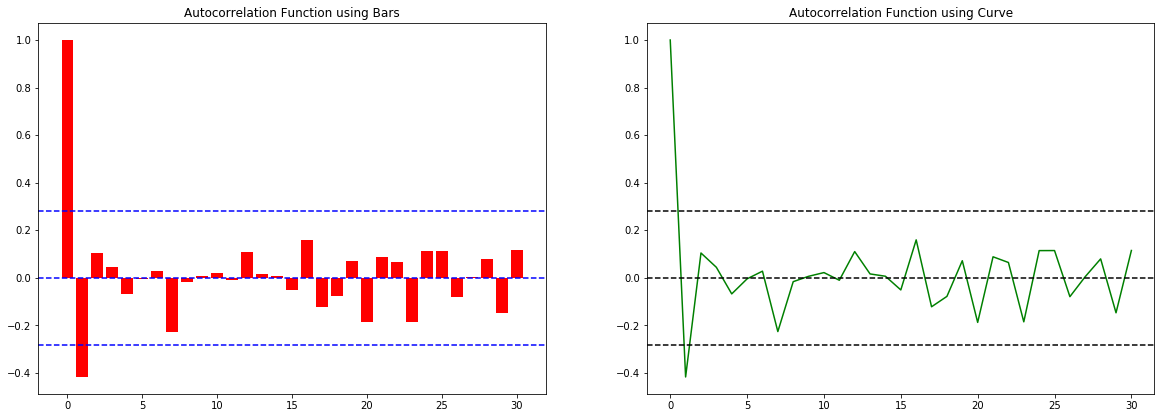

In [34]:
AR_acf = acf(DataMINUSshift.dropna() , nlags=30)
lags = np.array([i for i in range(31)])

# Creating a figure
fig = plt.figure(figsize=(20,15))

# Defining subplots and their positions in the figure
fig1 = fig.add_subplot(221)
fig2 = fig.add_subplot(222)


fig1.bar(lags, AR_acf , color = 'red')
fig1.axhline(y=0,linestyle='--',color='blue')
fig1.axhline(y=-1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='blue')
fig1.axhline(y=1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='blue')
fig1.set_title('Autocorrelation Function using Bars')

fig2.plot(AR_acf, color = 'green')
fig2.axhline(y=0,linestyle='--',color='black')
fig2.axhline(y=-1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='black')
fig2.axhline(y=1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='black')
fig2.set_title('Autocorrelation Function using Curve')

plt.show()

## From Partial AutoCorrelation plot, we can see around 1 curve enters / intersects confidence interval.
So, for first our value of p = 1.

# 2. Integrated

### From the above we removed the trend from data by shifting it by 1. So, value of d = 1.

# 3. Moving Average

In [35]:
# Importing acf (autocorrelation function) from statsmodels package
from statsmodels.tsa.stattools import pacf

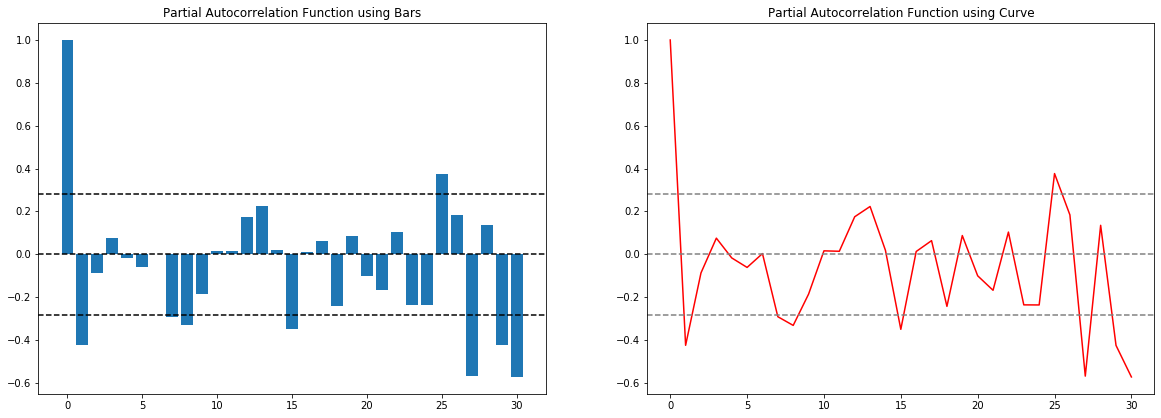

In [36]:
AR_pacf = pacf(DataMINUSshift.dropna() , nlags=30)
lags = np.array([i for i in range(31)])

# Creating a figure
fig = plt.figure(figsize=(20,15))

# Defining subplots and their positions in the figure
fig1 = fig.add_subplot(221)
fig2 = fig.add_subplot(222)


fig1.bar(lags, AR_pacf )
fig1.axhline(y=0,linestyle='--',color='black')
fig1.axhline(y=-1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='black')
fig1.axhline(y=1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='black')
fig1.set_title('Partial Autocorrelation Function using Bars')

fig2.plot(AR_pacf , color = 'red')
fig2.axhline(y=0,linestyle='--',color='gray')
fig2.axhline(y=-1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig2.axhline(y=1.96/np.sqrt(len(DataMINUSshift.dropna())),linestyle='--',color='gray')
fig2.set_title('Partial Autocorrelation Function using Curve')

plt.show()

## Autocorrelation plot is same as Partial Autocorrelation.
So, our value of q = 1.

# Time Series Analysis
We do Analysis by 3 Models:
1. AR Model
2. MA Model
3. ARIMA Model

### Import ARIMA from statsmodels Package.

In [37]:
from statsmodels.tsa.arima_model import ARIMA

## AR Model

First we define AR_Forecast Model with parameter p = 1 , d = 1 and q = 0 then we fit it and use it to forecast values.

In [38]:
AR_Forecast = ARIMA(Model_Dataset, order=(1, 1, 0))

In [39]:
AR_Forecast_fit = AR_Forecast.fit(disp=-1) 

The Akaike information criterion (AIC) score of AR Model

In [40]:
AR_Forecast_fit.aic

137.4399658483266

Root Mean Square Error (RMSE) of the Model

In [41]:
RMSE_AR = np.sqrt(mean_squared_error(DataMINUSshift,AR_Forecast_fit.fittedvalues))
RMSE_AR

0.952821611836535

Visualization

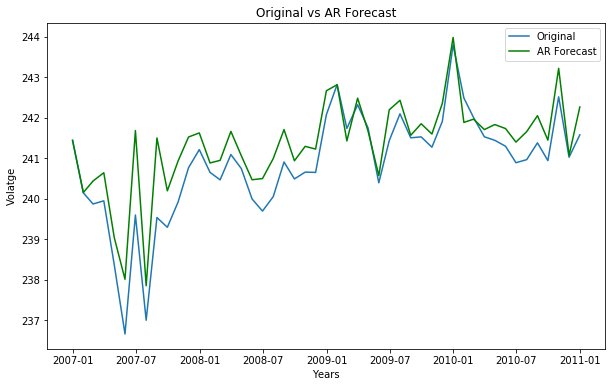

In [42]:
# Cummulative sum of fitted values to reverse back the difference taken in start
Pred_AR_diff = pd.Series(AR_Forecast_fit.fittedvalues, copy=True)
Pred_AR_diff_cumsum = Pred_AR_diff.cumsum()

# Taking back to Original Scale
Pred_AR = pd.Series(Model_Dataset['Voltage'] , index=Model_Dataset.index)
Pred_AR = Pred_AR.add(Pred_AR_diff_cumsum,fill_value=0)

# Ploting graph Original vs Forecasted
plt.figure(figsize=[10,6])
plt.plot(Model_Dataset.iloc[:,0] , label = 'Original')
plt.plot(Pred_AR , color = 'green' , label = 'AR Forecast')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Original vs AR Forecast')

plt.show()

## This Model Forecasted pretty well as we can see in many occassions actual value and forecasted value are same.

# MA Model

First we define MA_Forecast Model with parameter p = 0 , d = 1 and q = 1 then we fit it and use it to forecast values.

In [43]:
MA_Forecast = ARIMA(Model_Dataset, order=(0, 1, 1))

In [44]:
MA_Forecast_fit = MA_Forecast.fit(disp=-1) 

AIC Score

In [45]:
MA_Forecast_fit.aic

137.8004372132036

RMSE 

In [46]:
RMSE_MA = np.sqrt(mean_squared_error(DataMINUSshift,MA_Forecast_fit.fittedvalues))
RMSE_MA

0.9561268652460111

Visualization

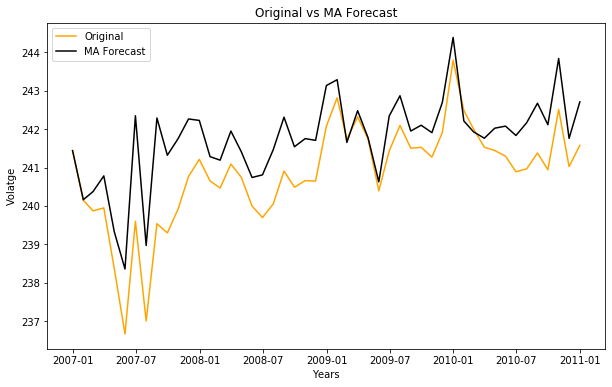

In [47]:
# Cummulative sum of fitted values to reverse back the difference taken in start
Pred_MA_diff = pd.Series(MA_Forecast_fit.fittedvalues, copy=True)
Pred_MA_diff_cumsum = Pred_MA_diff.cumsum()

# Taking back to Original Scale
Pred_MA = pd.Series(Model_Dataset['Voltage'] , index=Model_Dataset.index)
Pred_MA = Pred_MA.add(Pred_MA_diff_cumsum,fill_value=0)

# Ploting graph Original vs Forecasted
plt.figure(figsize=[10,6])
plt.plot(Model_Dataset.iloc[:,0] ,color = 'orange' , label = 'Original')
plt.plot(Pred_MA , color = 'black' , label = 'MA Forecast')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Original vs MA Forecast')

plt.show()

## Result produced by this model is not as good as we get from AR Model.

# -> ARIMA Model
Now we use Combined ARIMA Modeling to create a model to forcast the Voltage.

Making Forcast_Model of the order ( p=1, d=1, q=1)

In [48]:
Forcast_Model = ARIMA(Model_Dataset , order = (1,1,1))

fit Forcast_Model

In [49]:
Forcast_Model_fit = Forcast_Model.fit()

AIC Score of ARIMA model

In [50]:
Forcast_Model_fit.aic

138.12636453172675

RMSE 

In [51]:
RMSE = np.sqrt(mean_squared_error(DataMINUSshift,Forcast_Model_fit.fittedvalues))
RMSE

0.9532302520778726

### Visualization

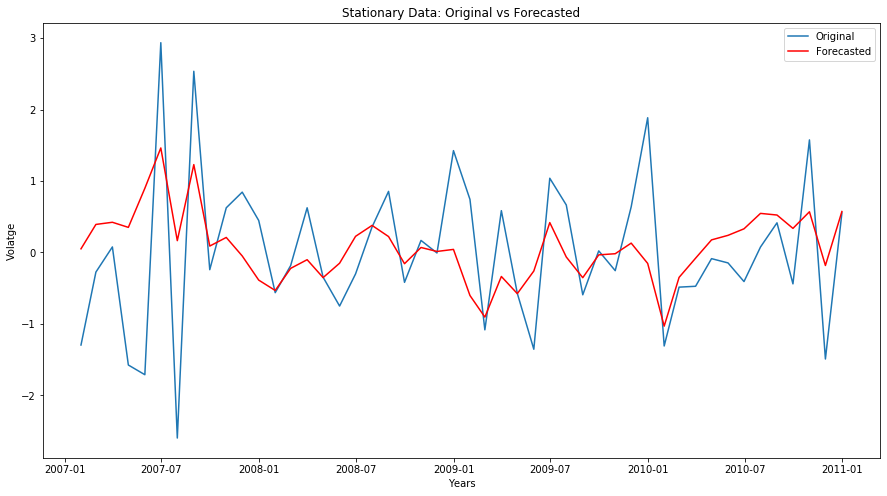

In [52]:
plt.figure(figsize=[15,8])
plt.plot(DataMINUSshift , label = 'Original')
plt.plot(Forcast_Model_fit.fittedvalues, color='red' , label = 'Forecasted')
plt.legend(loc = 'best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Stationary Data: Original vs Forecasted')

plt.show()

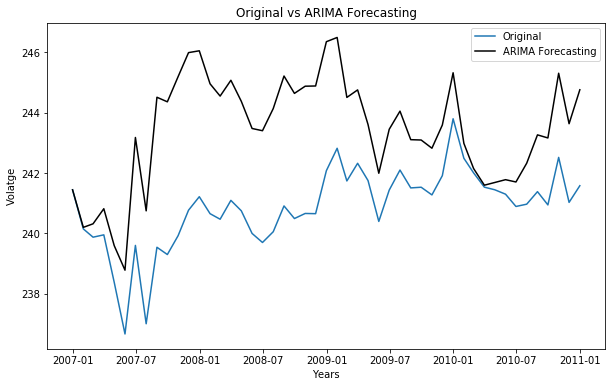

In [53]:
# Cummulative sum of fitted values to reverse back the difference taken in start
Forecast_diff = pd.Series(Forcast_Model_fit.fittedvalues, copy=True)
Forecast_diff_cumsum = Forecast_diff.cumsum()

# Taking back to Original Scale
Forecast_value = pd.Series(Model_Dataset['Voltage'] , index=Model_Dataset.index)
Forecast_value = Forecast_value.add(Forecast_diff_cumsum,fill_value=0)

# Ploting graph Original vs Forecasted
plt.figure(figsize=[10,6])
plt.plot(Model_Dataset.iloc[:,0] , label = 'Original')
plt.plot(Forecast_value , color = 'black' , label = 'ARIMA Forecasting')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Original vs ARIMA Forecasting')

plt.show()

## From this plot we can see it is also not producing good result as we get from AR Model.

**But we do Hyperparameter tunning for this Model.**

## Hyperparameter Tunning
**We find perfect pair of  p , d & q  as they are main parameter of ARIMA Model**

We use AIC score to find the best value of ther parameters.

**Note:-** Smaller the value of AIC, better the Model forecast with those parameter.

In [54]:
# We may get some warning doing Tunning. So we ignore them

warnings.filterwarnings('ignore')

In [55]:
# Setting some range for parameter 
p_value = d_value = q_value = range(4) 

# Creating Empty list to store all AIC score
aic_list=[]

In [56]:
for p in p_value:
    for d in d_value:
        for q in q_value:
            odr = (p,d,q)
            try:
                arima_model = ARIMA(Model_Dataset , order = odr)
                arima_model_fit = arima_model.fit()
                aic_list.append((odr , arima_model_fit.aic))
                print(f"Order {odr} : AIC = {arima_model_fit.aic}")
            except:
                continue

Order (0, 0, 0) : AIC = 168.0984795035027
Order (0, 0, 1) : AIC = 154.40950158067682
Order (0, 0, 2) : AIC = 146.6937648161696
Order (0, 0, 3) : AIC = 143.7638372425413
Order (0, 1, 0) : AIC = 144.77013086207944
Order (0, 1, 1) : AIC = 137.8004372132036
Order (0, 1, 2) : AIC = 139.05898613659366
Order (0, 1, 3) : AIC = 139.69392276332283
Order (0, 2, 0) : AIC = 191.1108725965374
Order (0, 2, 1) : AIC = 148.59846057960021
Order (0, 2, 2) : AIC = 142.85995976570268
Order (0, 2, 3) : AIC = 143.7340323929928
Order (1, 0, 0) : AIC = 140.8552721968364
Order (1, 0, 1) : AIC = 139.0156485222507
Order (1, 0, 2) : AIC = 139.19959182727067
Order (1, 0, 3) : AIC = 140.89568857417356
Order (1, 1, 0) : AIC = 137.4399658483266
Order (1, 1, 1) : AIC = 138.12636453172675
Order (1, 1, 2) : AIC = 138.3294925187377
Order (1, 1, 3) : AIC = 138.43117845471474
Order (1, 2, 0) : AIC = 163.53630447147663
Order (1, 2, 1) : AIC = 142.16292421224165
Order (1, 2, 2) : AIC = 145.754730267195
Order (2, 0, 0) : AIC =

### Sort aic_list to get smallest aic score

In [57]:
Sorted_aic_list = sorted(aic_list, key = lambda x : x[1] )
Sorted_aic_list[0]

((2, 1, 3), 133.50656762385398)

## Finalising Model

Parameters to use:
p = 2 , d = 1 , q = 3

In [58]:
Final_ARIMA_Model = ARIMA(Model_Dataset , order = Sorted_aic_list[0][0])

In [59]:
Final_ARIMA_Model_fit = Final_ARIMA_Model.fit()

AIC score

In [60]:
Final_ARIMA_Model_fit.aic

133.50656762385398

RMSE of Final_ARIMA_Model_fit

In [61]:
Best_RMSE = np.sqrt(mean_squared_error(DataMINUSshift,Final_ARIMA_Model_fit.fittedvalues))
Best_RMSE

0.8773017337354373

## This **AIC Score and Root Mean Square Error are smallest** from all above Models. So this is best Model.

**Visualization**

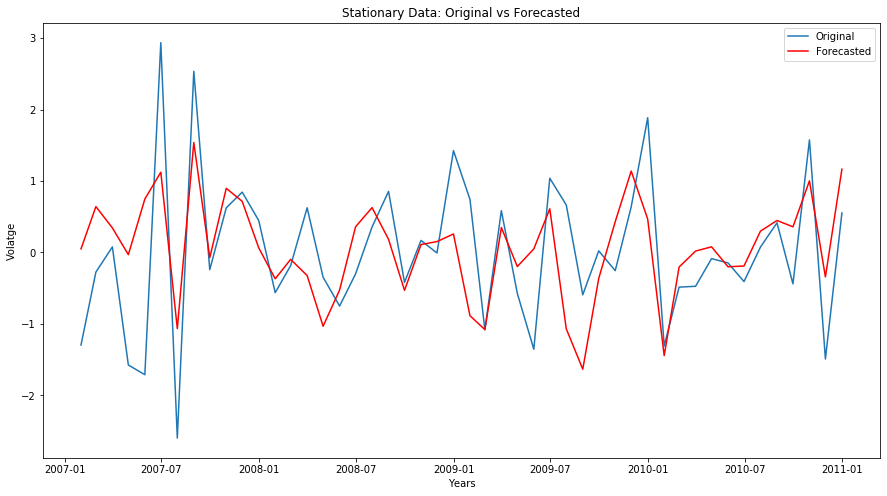

In [62]:
plt.figure(figsize=[15,8])
plt.plot(DataMINUSshift , label = 'Original')
plt.plot(Final_ARIMA_Model_fit.fittedvalues, color='red' , label = 'Forecasted')
plt.legend(loc = 'best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Stationary Data: Original vs Forecasted')

plt.show()

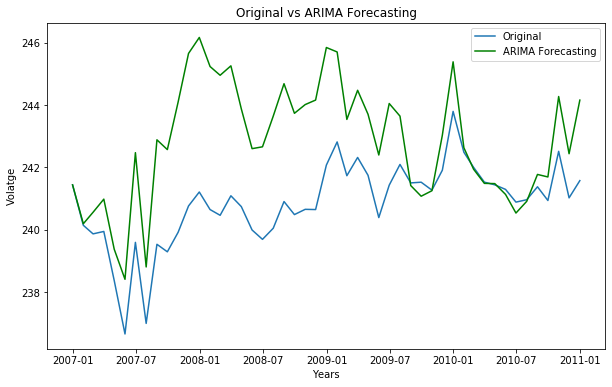

In [63]:
# Cummulative sum of fitted values to reverse back the difference taken in start
Best_Forecast_diff = pd.Series(Final_ARIMA_Model_fit.fittedvalues, copy=True)
Best_Forecast_diff_cumsum = Best_Forecast_diff.cumsum()

# Taking back to Original Scale
Best_Forecast_value = pd.Series(Model_Dataset['Voltage'] , index=Model_Dataset.index)
Best_Forecast_value = Best_Forecast_value.add(Best_Forecast_diff_cumsum,fill_value=0)

# Ploting graph Original vs Forecasted
plt.figure(figsize=[10,6])
plt.plot(Model_Dataset.iloc[:,0] , label = 'Original')
plt.plot(Best_Forecast_value , color = 'green' , label = 'ARIMA Forecasting')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Volatge')
plt.title('Original vs ARIMA Forecasting')

plt.show()

### This Plot shows most promising Result. We can after year 2009 actual data is same as of forecasted values in many cases.

# Comaprision between Models Before and After Tunning

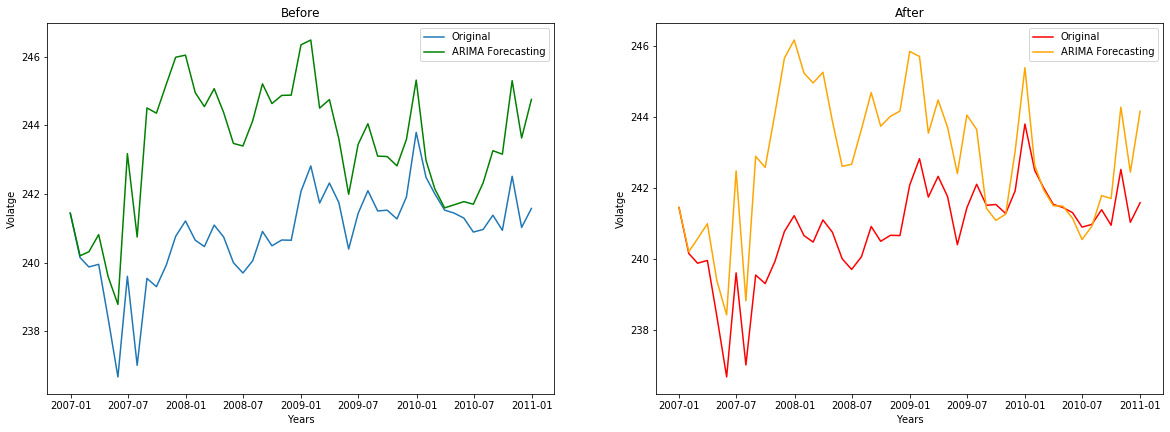

In [64]:
# Creating a figure
fig = plt.figure(figsize=(20,15))

# Defining subplots and their positions in the figure
fig1 = fig.add_subplot(221)
fig2 = fig.add_subplot(222)


fig1.plot(Model_Dataset.iloc[:,0] , label = 'Original')
fig1.plot(Forecast_value , color = 'green' , label = 'ARIMA Forecasting')
fig1.legend(loc='best')
fig1.set_xlabel('Years')
fig1.set_ylabel('Volatge')
fig1.set_title('Before')

fig2.plot(Model_Dataset.iloc[:,0] ,color = 'red', label = 'Original')
fig2.plot(Best_Forecast_value , color = 'orange' , label = 'ARIMA Forecasting')
fig2.legend(loc='best')
fig2.set_xlabel('Years')
fig2.set_ylabel('Volatge')
fig2.set_title('After')

plt.show()

## Clearly there is alot of differnece between both graphs. After Parameter tunning Forecasting Value are very close to Original Values. Even many time Original and Forecasted Values coinciding on each other.

# Predicting Future Values

We use **plot_predict function** to predict future values.

lets say we are going to predict Voltage of next 3 years .i.e., 36 months

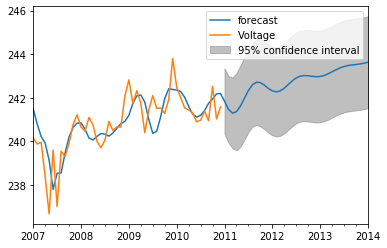

In [65]:
grph = Final_ARIMA_Model_fit.plot_predict(1,85)

### Voltage of the house for the next 3 years will always be in this confidence interval. It never be more or less than this interval.